In [86]:
# Notebook for code development for vehicle stock module (vsm)

# 21 Oct 2025 - don't trust the vehicle stock data from starter kit or ministry. basing everything off PKM --> better utility as it can be used without houndin' the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# INPUT DATA

In [87]:
# Temporarily store pkm_by_mode data here to be used
# Fixed data. Can replace by what Tang gives us.
def return_input_data(): # Fixed data (can replace by what Tang gives us)
    # === PASSENGER TRANSPORT (passenger-kilometres, million pkm) ===
    pkm_by_mode = {
        2018: {'CAR': 6250.6, 'BUS': 4464.3, 'MOTO': 2678.6,
               'TRAIN': 892.9, 'WALK': 1785.7, 'BIKE': 1785.7, 'PLANE': 1000.0},
        2019: {'CAR': 6562.5, 'BUS': 4687.5, 'MOTO': 2812.5,
               'TRAIN': 937.5, 'WALK': 1875.0, 'BIKE': 1875.0, 'PLANE': 1050.0},
        2020: {'CAR': 6891.6, 'BUS': 4918.8, 'MOTO': 2953.1,
               'TRAIN': 984.4, 'WALK': 1978.8, 'BIKE': 1978.8, 'PLANE': 950.0},   # pandemic dip
        2021: {'CAR': 7235.5, 'BUS': 5168.2, 'MOTO': 3100.9,
               'TRAIN': 1033.6, 'WALK': 2067.3, 'BIKE': 2067.3, 'PLANE': 1100.0},
        2022: {'CAR': 7607.3, 'BUS': 5426.6, 'MOTO': 3256.0,
               'TRAIN': 1085.3, 'WALK': 2170.7, 'BIKE': 2170.7, 'PLANE': 1150.0},
        2023: {'CAR': 7825.2, 'BUS': 5589.5, 'MOTO': 3354.3,
               'TRAIN': 1117.9, 'WALK': 2235.8, 'BIKE': 2235.8, 'PLANE': 1200.0},
        2024: {'CAR': 8059.0, 'BUS': 5757.1, 'MOTO': 3454.3,
               'TRAIN': 1151.0, 'WALK': 2302.9, 'BIKE': 2302.9, 'PLANE': 1250.0},
        2025: {'CAR': 8301.8, 'BUS': 5930.0, 'MOTO': 3558.0,
               'TRAIN': 1185.9, 'WALK': 2371.9, 'BIKE': 2371.9, 'PLANE': 1300.0},
        2026: {'CAR': 8540.0, 'BUS': 6107.5, 'MOTO': 3664.5,
               'TRAIN': 1221.5, 'WALK': 2443.0, 'BIKE': 2443.0, 'PLANE': 1350.0},
        2027: {'CAR': 8796.7, 'BUS': 6290.5, 'MOTO': 3780.3,
               'TRAIN': 1261.1, 'WALK': 2526.2, 'BIKE': 2526.2, 'PLANE': 1400.0},
        2028: {'CAR': 9058.9, 'BUS': 6482.4, 'MOTO': 3899.9,
               'TRAIN': 1295.8, 'WALK': 2591.7, 'BIKE': 2591.7, 'PLANE': 1450.0},
        2029: {'CAR': 9333.0, 'BUS': 6673.6, 'MOTO': 4011.6,
               'TRAIN': 1334.7, 'WALK': 2669.4, 'BIKE': 2669.4, 'PLANE': 1500.0},
        2030: {'CAR': 9622.0, 'BUS': 6873.6, 'MOTO': 4129.1,
               'TRAIN': 1374.7, 'WALK': 2749.4, 'BIKE': 2749.4, 'PLANE': 1550.0}
    }

    # === FREIGHT TRANSPORT (tonne-kilometres, million tkm) ===
    tkm_by_mode = {
        2018: {'TRUCK': 200000, 'RAIL_FREIGHT': 60000, 'SHIP': 400000, 'AIR_FREIGHT': 1500},
        2019: {'TRUCK': 210000, 'RAIL_FREIGHT': 62000, 'SHIP': 410000, 'AIR_FREIGHT': 1600},
        2020: {'TRUCK': 190000, 'RAIL_FREIGHT': 58000, 'SHIP': 390000, 'AIR_FREIGHT': 1200},
        2021: {'TRUCK': 220000, 'RAIL_FREIGHT': 64000, 'SHIP': 420000, 'AIR_FREIGHT': 1700},
        2022: {'TRUCK': 225000, 'RAIL_FREIGHT': 66000, 'SHIP': 430000, 'AIR_FREIGHT': 1800},
        2023: {'TRUCK': 235000, 'RAIL_FREIGHT': 68000, 'SHIP': 440000, 'AIR_FREIGHT': 1900},
        2024: {'TRUCK': 245000, 'RAIL_FREIGHT': 70000, 'SHIP': 450000, 'AIR_FREIGHT': 2000},
        2025: {'TRUCK': 255000, 'RAIL_FREIGHT': 72000, 'SHIP': 460000, 'AIR_FREIGHT': 2100},
        2026: {'TRUCK': 265000, 'RAIL_FREIGHT': 74000, 'SHIP': 470000, 'AIR_FREIGHT': 2200},
        2027: {'TRUCK': 275000, 'RAIL_FREIGHT': 76000, 'SHIP': 480000, 'AIR_FREIGHT': 2300},
        2028: {'TRUCK': 285000, 'RAIL_FREIGHT': 78000, 'SHIP': 490000, 'AIR_FREIGHT': 2400},
        2029: {'TRUCK': 295000, 'RAIL_FREIGHT': 80000, 'SHIP': 500000, 'AIR_FREIGHT': 2500},
        2030: {'TRUCK': 310000, 'RAIL_FREIGHT': 82000, 'SHIP': 510000, 'AIR_FREIGHT': 2600}
    }

    # === OCCUPANCY / LOAD FACTORS ===
    occ_by_mode = {
        year: {
            # Passenger modes (passengers per vehicle)
            'BUS': 15,
            'CAR': 2,
            'MOTO': 1.5,
            'WALK': 1,
            'BIKE': 1,
            'TRAIN': 200,
            'PLANE': 150,
            # Freight modes (tonnes per vehicle)
            'TRUCK': 10,
            'RAIL_FREIGHT': 1000,
            'SHIP': 20000,
            'AIR_FREIGHT': 50
        }
        for year in range(2018, 2031)
    }

    # === AVERAGE ANNUAL KILOMETRAGE ===
    kilometrage_by_mode = {
        year: {
            'BUS':     30000,    # km/year
            'CAR':     20000,
            'MOTO':    12000,
            'WALK':     300,
            'BIKE':    1500,
            'TRAIN':   150000,
            'PLANE':   2000000,   # km/year per aircraft
            'TRUCK':   100000,
            'RAIL_FREIGHT': 100000,
            'SHIP':    600000,
            'AIR_FREIGHT': 2000000
        }
        for year in range(2018, 2031)
    }

    return pkm_by_mode, tkm_by_mode, occ_by_mode, kilometrage_by_mode

In [88]:
# return age data - EXISTING STOCK (based on GIZ INFRAS 2019 Kenya data)
def return_age_data_cumulative_stock():
    age_data = pd.read_excel('./../data/vehicle_stock/age_distribution.xlsx')
    return age_data

In [89]:
# return age data - NEW STOCK (based on Zambian vehicle registration data (Malindi))
def return_age_data_new_stock():
    new_age_data = pd.read_excel('./../data/vehicle_stock/age_distribution_new_vehicles.xlsx')
    return new_age_data

In [90]:
# calibrate age data for additional stock, based on empirical_df (data from Malindi)
def generate_calibrated_age_data_new_stock(empirical_df, base_year=2018, end_year=2030, shape=2):
    """
    Generate dynamic age distributions for new vehicle stock (imports)
    calibrated from empirical import-age data (e.g., Zambia MOT data).

    Args:
        empirical_df: DataFrame with 'age' and columns like 'CAR_2015', 'CAR_2016', ...
        base_year: start year for model
        end_year: final year for model
        shape: controls width of age distribution

    Returns:
        DataFrame with columns ['age', '<MODE>_<YEAR>'] for model use
    """

    ages = empirical_df['age'].values
    modes = sorted(set(col.split('_')[0] for col in empirical_df.columns if '_' in col))
    df_out = pd.DataFrame({'age': ages})

    for mode in modes:
        # 1. Get empirical means for that mode
        year_cols = [c for c in empirical_df.columns if c.startswith(mode)]
        years = np.array([int(c.split('_')[1]) for c in year_cols])
        mean_ages = [
            np.sum(empirical_df['age'] * empirical_df[c]) / np.sum(empirical_df[c])
            for c in year_cols
        ]

        # 2. Fit a simple linear trend for mean import age
        coeffs = np.polyfit(years, mean_ages, 1)
        mean_func = np.poly1d(coeffs)

        # 3. Generate distributions for each target year
        for year in range(base_year, end_year + 1):
            mean_age = mean_func(year)

            # Gaussian-like distribution centred around mean_age
            pdf = np.exp(-((ages - mean_age) ** 2) / (2 * (shape ** 2)))
            pdf[ages < 0] = 0
            pdf /= pdf.sum()

            df_out[f"{mode}_{year}"] = pdf

    return df_out

In [91]:
# vaidation plot
def plot_import_age_distributions(age_data_new_stock, mode='CAR', base_year=2018, end_year=2030):
    """
    Plot the evolution of import-age distributions for a given vehicle mode.

    Args:
        age_data_new_stock: DataFrame from generate_calibrated_age_data_new_stock()
        mode (str): vehicle type (e.g. 'CAR', 'BUS', 'MOTO')
        base_year (int): first year
        end_year (int): last year
    """
    plt.figure(figsize=(8, 5))
    ages = age_data_new_stock['age']

    for year in range(base_year, end_year + 1):
        col = f"{mode}_{year}"
        if col in age_data_new_stock.columns:
            plt.plot(ages, age_data_new_stock[col], label=str(year), alpha=0.7)

    plt.title(f"Evolution of import-age distribution for {mode} (Zambia, {base_year}–{end_year})")
    plt.xlabel("Vehicle age at import (years)")
    plt.ylabel("Share of imports")
    plt.legend(loc="upper right", ncol=2, fontsize=8)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

In [92]:
# # 1. load empirical data (processed from Malindi data)
# empirical_df = return_age_data_new_stock()
#
# # 2. produce age distributions for all mode based on empirical_df and projeced change
# age_data_new_stock = generate_calibrated_age_data_new_stock(empirical_df)
#
# # plot import age distributions
# plot_import_age_distributions(age_data_new_stock, mode='CAR')
# plot_import_age_distributions(age_data_new_stock, mode='BUS')
# plot_import_age_distributions(age_data_new_stock, mode='MOTO')

# CALCULATE BASE YEAR STOCK

In [93]:
def get_base_year_stock_from_pkm(
        pkm_by_mode,
        occ_by_mode,
        kilometrage_by_mode,
        age_data_cumulative,
        base_year=2018,
        vehicles=None):
    """
    Calculates base-year vehicle stock (by mode and age) directly from
    PKM, occupancy, and kilometrage. Does NOT use registration data (assumed not trustworthy).

    Args:
        pkm_by_mode (dict): Passenger-km by mode and year (million pkm).
        occ_by_mode (dict): Average occupancy per mode and year.
        kilometrage_by_mode (dict): Average annual kilometrage per vehicle.
        age_data_cumulative (DataFrame): Fractional age distribution (sums to 1 per mode).
        base_year (int): The year to use.
        vehicles (list): List of vehicle modes to include.

    Returns:
        dict: Nested dictionary {base_year: {vehicle: {age: vehicles}}}.
    """
    if vehicles is None:
        vehicles = list(pkm_by_mode[base_year].keys())

    # instantiate dict for base year stock
    base_year_stock = {base_year: {v: {} for v in vehicles}}

    for vehicle in vehicles:
        # 1. Calculate total fleet directly from PKM
        pkm = pkm_by_mode[base_year][vehicle] * 1e6  # convert million to units
        occ = occ_by_mode[base_year][vehicle]
        km = kilometrage_by_mode[base_year][vehicle]
        total_fleet = pkm / (occ * km)

        # 2. Apply age distribution (ensure normalised)
        col = [c for c in age_data_cumulative.columns if vehicle in c]
        if not col:
            raise ValueError(f"No age distribution found for {vehicle}")
        col = col[0]
        dist = age_data_cumulative[col].values
        dist = dist / np.sum(dist)  # normalize in case not summing to 1
        ages = age_data_cumulative['Age'].values

        # 3. Allocate total fleet by age (fleet * share)
        for age, share in zip(ages, dist):
            base_year_stock[base_year][vehicle][age] = np.round(total_fleet * share, 0)

    return base_year_stock

In [94]:
# Scrappage data
def generate_scrappage_curves(max_age=30):
    """
    Generate scrappage rates (age-specific) for various modes, calibrated
    to Kenyan-like lifetimes.
    Returns DataFrame indexed by age, columns = modes, where values are
    scrappage rate from age → age+1.
    """
    # Kenya-calibrated parameters (Weibull survival)
    params = {
        'CAR':     {'eta': 14, 'beta': 3.0},
        'MOTO':    {'eta': 9,  'beta': 2.5},
        'BUS':     {'eta': 12, 'beta': 3.5},
        'TRUCK':   {'eta': 10, 'beta': 3.2},
        'TRAIN':   {'eta': 25, 'beta': 3.5},
        'PLANE':   {'eta': 25, 'beta': 3.0},
        'SHIP':    {'eta': 30, 'beta': 3.5}
    }

    ages = np.arange(0, max_age + 1)
    scrappage = pd.DataFrame(index=ages, columns=params.keys(), dtype=float)

    for mode, p in params.items():
        S = np.exp(- (ages / p['eta']) ** p['beta'])
        # Scrappage rate: proportion that exit between a and a+1
        # i.e. 1 - S(a+1)/S(a)
        # For final age, assume full scrappage
        rates = 1 - (S[1:] / S[:-1])
        # Append rate = 1 for last age (everything scrapped)
        rates = np.append(rates, 1.0)
        scrappage[mode] = rates

    return scrappage

# RETURN COUNTRY DATA

In [95]:
def return_country_data(country, start_year=1990, end_year=2022):
    try:
        df = pd.read_excel(f"./../data/country_data/{country}/{country}.xlsx")
        country_data = df[['Country name', 'Variable', 'Type','Sub-type', 'Fuel', 'Destination', 'Data code', 'Unit'] + [y for y in range(
            start_year, end_year)]]
        return country_data
    except Exception as e:
        return f"an error occurred: {e}"

# CALCULATE DESIRED STOCK

In [96]:
# function to return desired vehicle fleet based on demand. Using basic formula vehicle_fleet = PKM / (occupancy * kilometrage)
def calculate_desired_stock(pkm_by_mode, occ_by_mode, kilometrage_by_mode):
    """Calculates the desired vehicle fleet for each mode based on PKM, occupancy, and annual kilometrage.

    Args:
        pkm_by_mode (dict): A dictionary containing PKM values for each mode and year.
        occ_by_mode (dict): A dictionary containing average occupancy values for each mode and year.
        kilometrage_by_mode (dict): A dictionary containing average annual kilometrage values for each mode and year.

    Returns:
        dict: A dictionary containing the desired vehicle fleet for each mode and year.
    """

    desired_stock = {}

    for year, pkm_data in pkm_by_mode.items():
        desired_stock[year] = {}
        for mode, pkm in pkm_data.items():
            occupancy = occ_by_mode[year][mode]
            kilometrage = kilometrage_by_mode[year][mode]
            desired_stock[year][mode] = 1e6 * pkm / (occupancy * kilometrage)  # pkm in million km

    return desired_stock

# CALCULATE ANNUAL VEHICLE STOCKS

In [97]:
def calculate_vehicle_stocks(
        desired_stock,
        base_year_stock,
        age_data_new_stock,
        scrappage_data,
        base_year=2018,
        end_year=2030,
        vehicles=None,
        shrink_strategy="none"  # "none" or "proportional_retirement"
    ):
    """
    PKM-driven annual stock evolution with scrappage & aging.
    No base_year_new_stock is required; annual additions are derived
    from the PKM-implied desired stock each year.

    Inputs:
      - desired_stock: dict[year][vehicle] -> total vehicles desired (from PKM/occ/km)
      - base_year_stock: dict[base_year][vehicle][age] -> initial age distribution
      - age_data_new_stock: DataFrame with columns like "<VEHICLE>_<year>" holding
        shares of additions by age for that year (or latest available year as fallback).
        This lets you represent imported used vehicles (age>0 on entry).
      - scrappage_data: DataFrame indexed by age with columns = vehicle (scrap rate from age->age+1)
      - shrink_strategy:
          "none" -> no accelerated scrappage if oversupplied
          "proportional_retirement" -> scale down each age bucket proportionally to meet target

    Returns:
      - annual_stock: dict[year][vehicle][age] -> vehicles
      - annual_additions: dict[year][vehicle][age] -> vehicles added that year (by age)
      - annual_scrap: dict[year][vehicle][age] -> vehicles scrapped in that year
    """

    if vehicles is None:
        # default to vehicles present in the base_year_stock
        vehicles = list(base_year_stock[base_year].keys())

    # Init outputs
    annual_stock = {base_year: base_year_stock[base_year].copy()}
    annual_scrap = {year: {v: {} for v in vehicles} for year in range(base_year, end_year + 1)}
    annual_additions = {year: {v: {} for v in vehicles} for year in range(base_year + 1, end_year + 1)}

    # Find last available year-specific column for new-stock age profile (fallback)
    latest_year = max([int(c.split('_')[-1]) for c in age_data_new_stock.columns if '20' in c])

    for year in range(base_year + 1, end_year + 1):
        annual_stock[year] = {}

        for vehicle in vehicles:
            prev_stock = annual_stock[year - 1][vehicle]
            max_age_prev = max(prev_stock.keys())
            # Ensure dense ages 0..max_age_prev
            # (some dicts may be sparse; fill missing ages with 0)
            prev_vector = np.array([prev_stock.get(a, 0.0) for a in range(max_age_prev + 1)])

            # --- 1) Scrappage on last year's stock ---
            ages = np.arange(len(prev_vector))
            # scrap rates by age (fallback to 1.0 beyond provided range)
            if vehicle in scrappage_data.columns:
                scrap_rates = np.array([
                    scrappage_data.loc[a, vehicle] if a in scrappage_data.index else 1.0
                    for a in ages
                ])
            else:
                # If no column for this vehicle, assume aggressive scrappage to avoid infinite aging
                scrap_rates = np.ones_like(ages, dtype=float)

            scrapped = prev_vector * scrap_rates
            survived = prev_vector - scrapped

            # Record scrappage for year-1 (scrap happens between y-1 and y)
            for a, s in enumerate(scrapped):
                annual_scrap[year - 1][vehicle][a] = float(s)

            # --- 2) Age survivors +1 year ---
            aged = np.zeros(len(survived) + 1)
            aged[1:] = survived  # everyone gets 1 year older

            # --- 3) Compute the gap to desired stock (before adding new vehicles) ---
            current_total = aged.sum()
            target_total = desired_stock[year][vehicle]
            gap = target_total - current_total

            # --- 4) Additions if gap > 0 (distribute by 'new stock' age profile) ---
            additions_by_age = np.zeros_like(aged)
            if gap > 0:
                # Pick this year's column or fallback to latest available
                col_name = f'{vehicle}_{year}' if f'{vehicle}_{year}' in age_data_new_stock.columns else f'{vehicle}_{latest_year}'

                # Get age shares; normalize to sum=1 (if column missing or all zeros, default to age 0)
                if col_name in age_data_new_stock.columns:
                    shares_series = age_data_new_stock[col_name]
                    # Align ages of the shares to our vector length; pad/truncate as needed
                    share_ages = age_data_new_stock['age'].values.astype(int)
                    shares = np.zeros_like(aged)
                    for a, sh in zip(share_ages, shares_series.values):
                        if a < len(shares):
                            shares[a] = sh
                    total_sh = shares.sum()
                    if total_sh <= 0:
                        shares[0] = 1.0
                        total_sh = 1.0
                    shares /= total_sh
                else:
                    shares = np.zeros_like(aged)
                    shares[0] = 1.0  # all new at age 0 as a safe default

                additions_by_age = gap * shares
                aged += additions_by_age

                # Record additions for reporting
                for a, add in enumerate(additions_by_age):
                    if add > 0:
                        annual_additions[year][vehicle][a] = float(add)

            # --- 5) Optional shrink if oversupplied (gap < 0) ---
            elif gap < 0 and shrink_strategy == "proportional_retirement":
                # scale all ages down proportionally so sum(aged) == target_total
                scale = target_total / current_total if current_total > 0 else 0.0
                aged *= scale
                # (no need to record a special "extra scrap": it’s an abstract adjustment)

            # Save year’s stock by age (as dict)
            annual_stock[year][vehicle] = {int(a): float(v) for a, v in enumerate(aged)}

    return annual_stock, annual_additions, annual_scrap


# RUN-THROUGH EXAMPLE


BUS — base year total: 9,925  target year total: 15,275
  Difference from target (2030): 0.00

CAR — base year total: 156,265  target year total: 240,550
  Difference from target (2030): 0.00

MOTO — base year total: nan  target year total: nan
  Difference from target (2030): nan


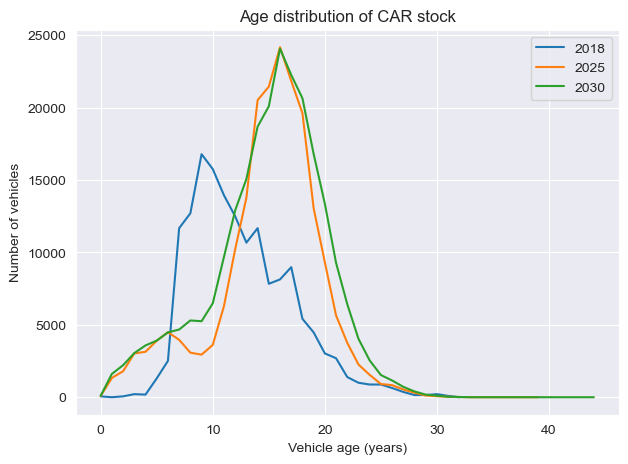

In [98]:
# === VEHICLE STOCK MODEL (PKM-BASED) ===

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------
# 1. INPUT DATA
# ---------------------------------------------------------------------

# Use your existing helper
pkm_by_mode, tkm_by_mode, occ_by_mode, kilometrage_by_mode = return_input_data()

base_year = 2018
end_year = 2030
vehicles = ['BUS', 'CAR', 'MOTO']

# ---------------------------------------------------------------------
# 2. AGE DISTRIBUTION DATA (fractions by age)
# ---------------------------------------------------------------------
age_data = return_age_data_cumulative_stock()      # for existing fleet
age_data_new_stock = return_age_data_new_stock()   # for new entrants (e.g. used imports)

# ---------------------------------------------------------------------
# 3. SCRAPPAGE DATA (Kenya-calibrated)
# ---------------------------------------------------------------------
scrappage_data = generate_scrappage_curves(max_age=30)

# ---------------------------------------------------------------------
# 4. CALCULATE BASE-YEAR STOCK DIRECTLY FROM PKM
# ---------------------------------------------------------------------
base_year_stock = get_base_year_stock_from_pkm(
    pkm_by_mode,
    occ_by_mode,
    kilometrage_by_mode,
    age_data_cumulative=age_data,
    base_year=base_year,
    vehicles=vehicles
)

# ---------------------------------------------------------------------
# 5. CALCULATE DESIRED STOCK FOR EACH YEAR (PKM-driven)
# ---------------------------------------------------------------------
desired_stock = calculate_desired_stock(pkm_by_mode, occ_by_mode, kilometrage_by_mode)

# ---------------------------------------------------------------------
# 6. CALCULATE ANNUAL STOCK EVOLUTION (NO BASE_YEAR_NEW_STOCK NEEDED)
# ---------------------------------------------------------------------
annual_stock, annual_additions, annual_scrap = calculate_vehicle_stocks(
    desired_stock=desired_stock,
    base_year_stock=base_year_stock,
    age_data_new_stock=age_data_new_stock,
    scrappage_data=scrappage_data,
    base_year=base_year,
    end_year=end_year,
    vehicles=vehicles,
    shrink_strategy="none"   # or "proportional_retirement"
)

# ---------------------------------------------------------------------
# 7. VALIDATION CHECKS
# ---------------------------------------------------------------------
for v in vehicles:
    totals = [sum(annual_stock[y][v].values()) for y in range(base_year, end_year + 1)]
    targets = [desired_stock[y][v] for y in range(base_year, end_year + 1)]
    print(f"\n{v} — base year total: {totals[0]:,.0f}  target year total: {totals[-1]:,.0f}")
    print(f"  Difference from target (2030): {targets[-1] - totals[-1]:,.2f}")

# ---------------------------------------------------------------------
# 8. OPTIONAL VISUALISATION
# ---------------------------------------------------------------------
def plot_age_distribution(vehicle, years=[2018, 2025, 2030]):
    plt.figure(figsize=(7,5))
    for y in years:
        ages = list(annual_stock[y][vehicle].keys())
        stock = list(annual_stock[y][vehicle].values())
        plt.plot(ages, stock, label=str(y))
    plt.title(f"Age distribution of {vehicle} stock")
    plt.xlabel("Vehicle age (years)")
    plt.ylabel("Number of vehicles")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example: plot cars over time
plot_age_distribution('CAR')

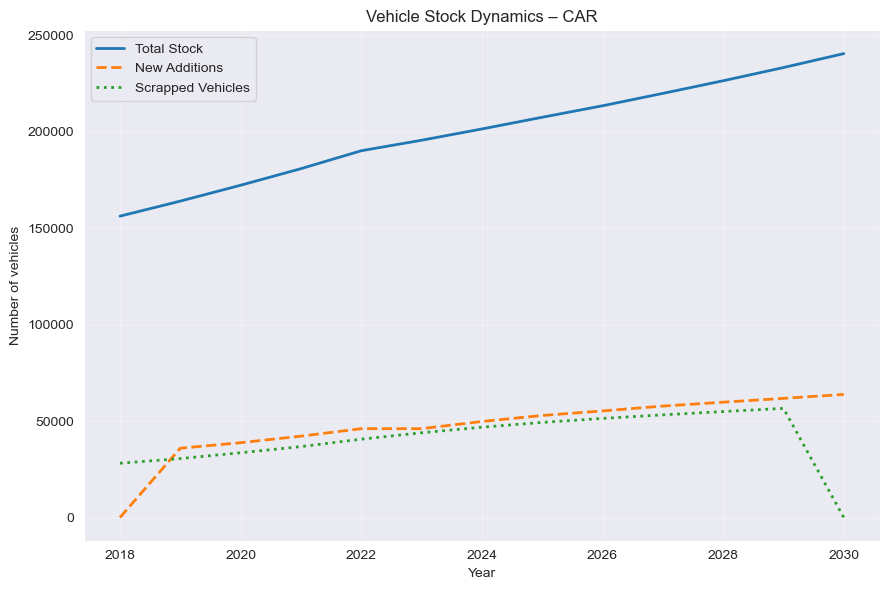

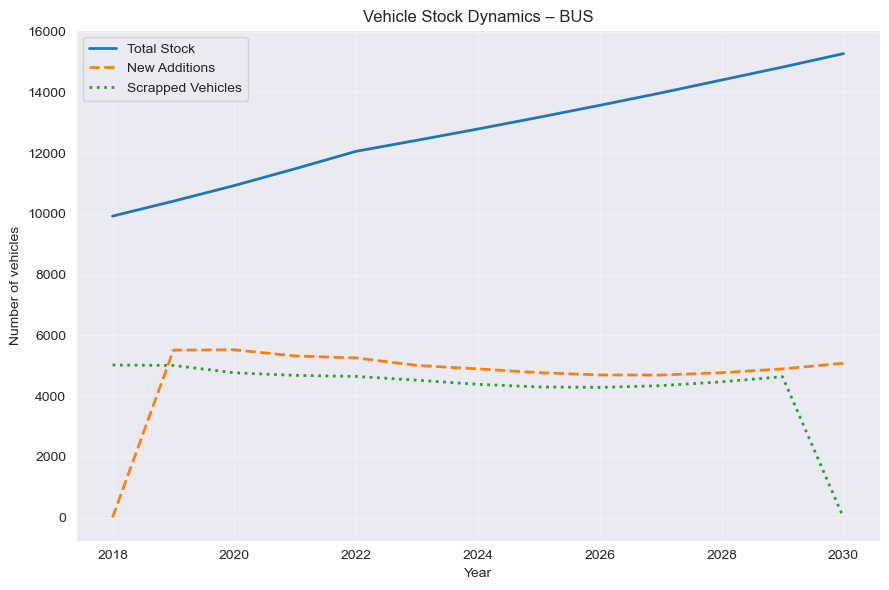

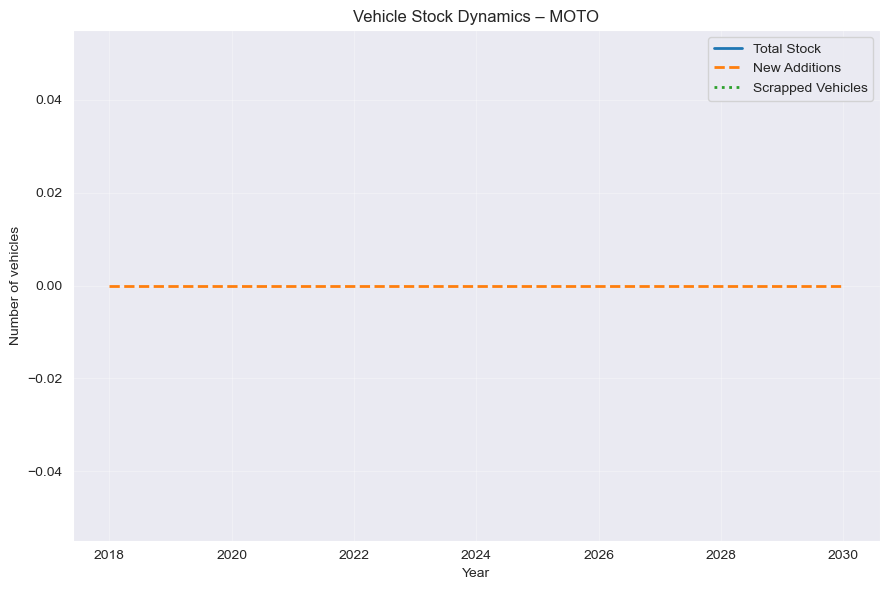

In [99]:
# Plot vehicle totals

def plot_vehicle_totals(annual_stock, annual_additions, annual_scrap, vehicle='CAR',
                        base_year=2018, end_year=2030):
    """
    Plot total stock, additions, and scrap over time for a given vehicle type.

    Args:
        annual_stock (dict): {year: {vehicle: {age: count}}}
        annual_additions (dict): {year: {vehicle: {age: count}}}
        annual_scrap (dict): {year: {vehicle: {age: count}}}
        vehicle (str): e.g. 'CAR', 'BUS', 'MOTO'
        base_year (int): start year
        end_year (int): final year
    """

    years = list(range(base_year, end_year + 1))

    # Sum over ages for each year
    stock_totals = [sum(annual_stock[y][vehicle].values()) for y in years]
    additions_totals = [sum(annual_additions.get(y, {}).get(vehicle, {}).values()) for y in years]
    scrap_totals = [sum(annual_scrap.get(y, {}).get(vehicle, {}).values()) for y in years]

    # Plot
    plt.figure(figsize=(9, 6))
    plt.plot(years, stock_totals, label='Total Stock', linewidth=2)
    plt.plot(years, additions_totals, label='New Additions', linestyle='--', linewidth=2)
    plt.plot(years, scrap_totals, label='Scrapped Vehicles', linestyle=':', linewidth=2)

    plt.title(f"Vehicle Stock Dynamics – {vehicle}")
    plt.xlabel("Year")
    plt.ylabel("Number of vehicles")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

# plots
plot_vehicle_totals(annual_stock, annual_additions, annual_scrap, vehicle='CAR')

plot_vehicle_totals(annual_stock, annual_additions, annual_scrap, vehicle='BUS')

plot_vehicle_totals(annual_stock, annual_additions, annual_scrap, vehicle='MOTO')

In [100]:
# recalibrate age data due to mismatch between Kenyan and Malindi data

def recalibrate_and_save_base_age_distributions(
        base_age_df,
        annual_stock,
        output_path='./../data/vehicle_stock/recalibrated_age_distribution.xlsx',
        target_year=2030,
        vehicles=None,
        smoothing=True):
    """
    Recalibrate base-year cumulative age distributions for all vehicle types
    to align with the steady-state model outcome and save as an Excel file.

    Args:
        base_age_df (DataFrame): Original cumulative age distribution data (e.g., Kenya)
        annual_stock (dict): Model output {year: {vehicle: {age: count}}}
        output_path (str): Path to save recalibrated Excel file
        target_year (int): Year used as "steady-state" reference
        vehicles (list): List of vehicle types to process (default = all columns in df)
        smoothing (bool): Apply mild moving-average smoothing

    Returns:
        DataFrame: recalibrated cumulative stock distributions (normalized)
    """

    if vehicles is None:
        vehicles = [c for c in base_age_df.columns if c != 'Age']

    recalibrated_df = pd.DataFrame({'Age': base_age_df['Age']})

    for vehicle in vehicles:
        # Skip if not in model output
        if vehicle not in annual_stock[target_year]:
            print(f"⚠️ Skipping {vehicle} — not found in annual_stock[{target_year}]")
            continue

        # Extract steady-state structure
        steady_state = annual_stock[target_year][vehicle]
        ages = np.array(list(steady_state.keys()))
        steady_values = np.array(list(steady_state.values()))
        steady_pdf = steady_values / steady_values.sum()

        # Original base-year distribution
        base_pdf = base_age_df[vehicle].values
        base_pdf /= base_pdf.sum()

        # Blend base-year (Kenya) and steady-state shapes
        recalibrated_pdf = 0.7 * steady_pdf + 0.3 * base_pdf
        recalibrated_pdf /= recalibrated_pdf.sum()

        # Optional smoothing
        if smoothing:
            recalibrated_pdf = np.convolve(recalibrated_pdf, np.ones(3)/3, mode='same')

        # Store in new DataFrame
        recalibrated_df[vehicle] = recalibrated_pdf

        # Diagnostic plot
        plt.figure(figsize=(7,5))
        plt.plot(base_age_df['Age'], base_pdf, '--', label='Original base (Kenya)', alpha=0.7)
        plt.plot(base_age_df['Age'], steady_pdf, label=f'Steady-state {target_year}', alpha=0.7)
        plt.plot(base_age_df['Age'], recalibrated_pdf, label='Recalibrated base', linewidth=2)
        plt.title(f"{vehicle}: Base vs Steady-state vs Recalibrated")
        plt.xlabel("Vehicle age (years)")
        plt.ylabel("Normalized share of stock")
        plt.legend()
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()

    # Save as Excel in same style as new_age_data table
    recalibrated_df.to_excel(output_path, index=False)
    print(f"✅ Recalibrated base-year age distributions saved to: {output_path}")

    return recalibrated_df

In [101]:
# 1. Run recalibration
age_data_cumulative_stock_recalibrated = recalibrate_and_save_base_age_distributions(
    base_age_df=age_data,
    annual_stock=annual_stock
)

# 2. Inspect and confirm
age_data_cumulative_stock_recalibrated.head()

⚠️ Skipping CAR_PETROL_SMALL — not found in annual_stock[2030]
⚠️ Skipping CAR_PETROL_MEDIUM — not found in annual_stock[2030]
⚠️ Skipping CAR_PETROL_LARGE — not found in annual_stock[2030]
⚠️ Skipping CAR_DIESEL_SMALL — not found in annual_stock[2030]
⚠️ Skipping CAR_DIESEL_MEDIUM — not found in annual_stock[2030]
⚠️ Skipping CAR_DIESEL_LARGE — not found in annual_stock[2030]
⚠️ Skipping MINIBUS_DIESEL — not found in annual_stock[2030]
⚠️ Skipping MINIBUS_PETROL — not found in annual_stock[2030]
⚠️ Skipping VAN_DIESEL — not found in annual_stock[2030]
⚠️ Skipping VAN_PETROL — not found in annual_stock[2030]
⚠️ Skipping MOTO_SMALL — not found in annual_stock[2030]
⚠️ Skipping MOTO_MEDIUM — not found in annual_stock[2030]
⚠️ Skipping MOTO_LARGE — not found in annual_stock[2030]
⚠️ Skipping COACH — not found in annual_stock[2030]
⚠️ Skipping TRUCK_SMALL — not found in annual_stock[2030]
⚠️ Skipping TRUCK_LARGE — not found in annual_stock[2030]
⚠️ Skipping Source — not found in annual_sto

,Age
0,0
1,1
2,2
3,3
4,4
